<img src='https://data.inpe.br/wp-content/uploads/2025/06/big-1.svg' align='right' width='100px'/>

# <span style='color:#336699'>Visualização e Extração de Séries Temporais de Valores de Radiação Solar Estimados pelo Modelo GL1.2</span>
<hr style='border:2px solid #0077b9;'>

<div style='text-align: center;font-size: 90%;'>
    Douglas Uba, Simone Marilene Sievert da Costa Coelho, Juan Ceballos<br/><br/>
    Programa BIG - Base de Informações Georreferenciadas do INPE<br/>
    DISSM -  Divisão de Satélites e Sensores Meteorológicos
    <br/>
    CGCT - Coordenação-Geral de Ciências da Terra
    <br/>
    INPE - Instituto Nacional de Pesquisas Espaciais, Brasil.
    <br/>
    Contato: <a href='mailto:douglas.uba@inpe.br'>douglas.uba@inpe.br</a>
    <br/><br/>
    Última Atualização: 12 de Fevereiro de 2026
</div>

<br/>

<div style='text-align: justify; margin-left: 25%; margin-right: 25%;'> <b>Resumo</b> - Este Jupyter Notebook demonstra como acessar e extrair séries temporais de dados de radiação solar. A base de dados original é a irradiância média diária estimada pelo modelo GL1.2 com base em imagens do canal visível dos satélites da série GOES. O processamento fornece uma visão geral sobre como usar o serviço STAC do INPE para descobrir e acessar as imagens produzidas pelo modelo GL1.2, em conjunto com exemplos básicos de processamento e visualização dos dados. Por último, um cubo de dados é construído e a extração da série temporal é realizada a partir de localizações específicas, dadas em coordenadas geográficas de latitude e longitude. </div>

## Introdução
<hr style='border:1px solid #0077b9;'>

A radiação solar (em suas diversas modalidades: global, direta e difusa) é reconhecida como a fonte principal da energia para fenômenos ambientais, meteorológicos e climáticos do planeta. Além disso, possui importante destaque em políticas energéticas de curto e longo prazos.

Desde  a  década  de  1980,  os  satélites  geoestacionários  como  os  das  séries  `GOES (Geostationary Operational Environmental Satellite)` e `Meteosat` permitiram desenvolver modelos de estimativa de irradiância solar com crescente acurácia e resolução espacial, baseados em imagens do canal visível (VIS). Diversos modelos fornecem estimativas de irradiância, *e.g.* GSIP/NOAA, CMSAF/SIS e BrasilSR. Vários Atlas recentes de radiação solar possuem base em dados de satélite, e.g. no Brasil e Uruguai.

### Modelo GL
<hr style='border:1px solid #0077b9;'>

O modelo GL 1.2 (Ceballos et al., 2004) é executado operacionalmente no CPTEC/INPE, processando imagens do canal VIS de satélites GOES (em diferentes instantes de tempo) e gerando matrizes de irradiância solar, com um total de 1800 x 1800 pixels e resolução espacial de 0,04º (grade regular).

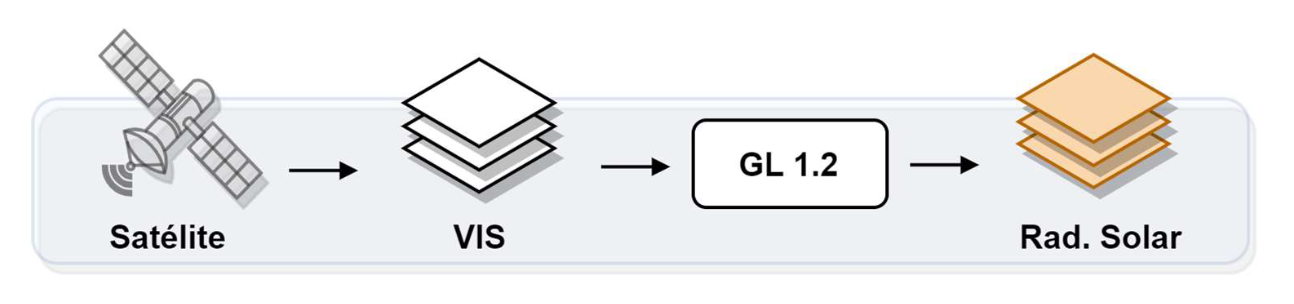

📚 No âmbito do Programa BIG/INPE, os dados produzidos pelo Modelo GL1.2 foram catalogados no Catálogo Integrado de Dados utilizando o padrão STAC - https://data.inpe.br/stac/browser.

Mais especificamente, foram considerados inicialmente os dados diários:

- 📙 `GOES-GL-DSWRF-Daily`: dados produzidos pelo modelo GL1.2 a partir de imagens do canal visível de diversos satélites da série GOES. Link: [GOES-GL-DSWRF-Daily](https://data.inpe.br/stac/browser/collections/GOES-GL-DSWRF-Daily-1);

Em resumo, os dados são gerados a partir de estimativas instantâneas inferidas pelo modelo GL1.2 e de imagens do canal visível dos satélites GOES (GOES-10, GOES-12, GOES-13, GOES-16, GOES-19). Para cada dia, as imagens instantâneas são integradas utilizando a regra do trapézio e o valor final é dividido por 24 horas para representar a irradiância média diária `(W/m²)`. Cada arquivo diário de dados é uma imagem cobrindo a América do Sul e os oceanos adjacentes. Cada pixel da imagem indica a radiação solar média diária.

## 👩🏽‍💻 STAC Client API
<hr style='border:1px solid #0077b9;'>

Para execução dos exemplos deste Jupyter Notebook, será instalado o pacote [pystac-client](https://pystac-client.readthedocs.io/en/latest/).

In [ ]:
# Não necessário no ambiente do BDC-Lab
#!pip install pystac-client

Para acessar as funcionalidades, importa-se o pacote `pystac_client`:

In [ ]:
import pystac_client
pystac_client.__version__

Em seguida, realiza-se a conexão com o serviço STAC BDC/BIG:

In [ ]:
service = pystac_client.Client.open(
    'https://data.inpe.br/bdc/stac/v1/'
)
service

Listando as coleções disponíveis, detacando a coleção que possui os dados produzidos pelo modelo GL1.2 - `Collection GOES-GL-DSWRF-Daily-1`.

In [ ]:
collections = list(service.get_collections())
print(f'Number of collections: {len(collections)}')
print('Collections IDs:')
for collection in collections:
    print(f'🛰️🌎\033[94m{collection.id}') if collection.id.find('GOES-GL') != -1 else print (f'\033[0m{collection.id}')

## 🔍 Recuperando Imagens Modelo GL1.2
<hr style='border:1px solid #0077b9;'>

Vamos utilizar o serviço STAC para recuperar as imagens produzidas pelo Modelo GL1.2 em um determinado ano; *i.e.* neste caso específico, o ano de 2024.

In [ ]:
year = '2025'

A partir do método `search`, definimos o nome da coleção (`collections=['GOES-GL-DSWRF-Daily-1']`).

Vamos utilizar o parâmetro `datetime` para restringir o período temporal de interesse; o ano de 2024.

Também utilizamos o parâmetro `sortby` para ordenarmos os itens que serão recuperados de acordo com a data de aquisição; *i.e.* de modo ascendente, de modo seguir a evolução temporal natural das imagens.

In [ ]:
# Search GL Model by date time. year = 2025
item_search = service.search(
    collections=['GOES-GL-DSWRF-Daily-1'],
    datetime=year, # <== desired year
    sortby=[{
        'field': 'properties.datetime',
        'direction': 'asc' # <== ascendant order
    }]
)

Verificando o número de `Items` recuperados no período:

In [ ]:
item_search.matched()

Na sequência, construímos uma lista com todos os `Items` que foram recuperados:

In [ ]:
items = list(item_search.items())

In [ ]:
import datetime
from collections import Counter

# Extract dates
dates = [
    datetime.datetime.fromisoformat(item.properties['datetime']).date()
    for item in items
]

# Count frequencies
counter = Counter(dates)

# Unique dates
unique_dates = sorted(counter.keys())

# Expected dates
start = datetime.date(int(year), 1, 1)
end   = datetime.date(int(year), 12, 31)
expected = {start + datetime.timedelta(days=i) for i in range((end - start).days + 1)}

# Missing dates
missing = sorted(expected - set(unique_dates))

print('Total de items retornados:', len(items))
print('Total esperado:', len(expected))
print('Datas faltantes:', missing)

Analisando o primeiro `Item` da lista:

In [ ]:
items[0]

No caso, vamos trabalhar com o `Asset dswrf_daily_mean`.

In [ ]:
items[0].assets['dswrf_daily_mean'].href

## 🖥️ Leitura da Imagem GL1.2
<hr style='border:1px solid #0077b9;'>

As imagens são fornecidas no formato [**Network Common Data Form (NetCDF)**](https://www.unidata.ucar.edu/software/netcdf/), amplamente utilizado para armazenar dados científicos multidimensionais, como variáveis climáticas e ambientais. Nesta seção, utilizaremos a biblioteca `netCDF4` para ler os dados produzidos pelo Modelo GL1.2 (`Asset dswrf_daily_mean`).

Para facilitar os processamentos, definimos aqui uma função `read_data`. Esta função recebe um `Item` STAC como parâmetro de entrada e realiza a abertura do arquivo `netCDF` a partir do atributo `href`. Por último, a matriz de pixels é extraída para um `Numpy Array`, bem como os limites geográficos do dado; `extent = [llx, lly, urx, ury]`. Por último, ambos os valores são retornados pela função.

In [ ]:
from netCDF4 import Dataset
import numpy as np
import requests

def read_data(item):
    r = requests.get(item.assets['dswrf_daily_mean'].href)
    r.raise_for_status()
    nc = Dataset('memory', memory=r.content)
    data = np.flipud(nc.variables['Band1'][:] * 0.1)
    latitudes = nc.variables['lat'][:]
    longitudes = nc.variables['lon'][:]
    extent = [
        np.min(longitudes), np.min(latitudes),
        np.max(longitudes), np.max(latitudes),
    ]
    return data, extent

Realizando a leitura e visualização do primeiro `Item`:

In [ ]:
data, extent = read_data(items[0])

## 📈 Plot Básico
<hr style='border:1px solid #0077b9;'>

Usaremos então o suporte fornecido pelo pacote `matplotlib` para visualizarmos, neste momento, de modo básico, os dados produzidos pelo modelo G1.2.

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(data)

Podemos melhorar um pouco este resultado, adicionando algumas decorações.

Um título informativo, com a data e hora de aquisição da imagem, além de uma barra de cores indicando o significado dos valores exibidos (*i.e.* legenda).

In [ ]:
# Choose the plot size (width x height, in inches)
plt.figure(figsize=(9,9))

# Plot the image
plt.imshow(data, vmin=0.0, vmax=400.0)

# Add colorbar
plt.colorbar(label='W/m2', extend='both', orientation='vertical', pad=0.05, shrink=0.75)

# Add a title (one on the left and one on the right)
plt.title('Modelo GL1.2 - {}'.format(items[0].properties['datetime']), fontweight='bold', fontsize=10, loc='left')
plt.title('Programa BIG - DISSM/CGCT/INPE', fontsize=10, loc='right')

Vamos também construir um mapa de cores mais adequado para a visualização dos dados. Definimos o método `solar_colormap()`, capaz de construir um mapa de cores específico para nossas análises.

Utilizamos o suporte fornecido pelo `matplotlib - LinearSegmentedColormap`.

In [ ]:
vmin, vmax = 0.0, 400.0
def solar_colormap():
    colors = [
        '#000033',  # very dark blue
        '#00124f',  # dark navy
        '#002a8a',  # deep blue
        '#0043c1',  # saturated blue
        '#0065d4',  # medium blue
        '#3ca8ff',  # light blue
        '#b7ecff',  # very light cyan
        '#fff7c4',  # pale yellow
        '#ffcb4a',  # warm yellow
        '#ff8c1a',  # orange
        '#ff3c00',  # red-orange
        '#cc1a00',  # deep orange-red
        '#800040'   # purple tail
    ]
    cmap = LinearSegmentedColormap.from_list('SolarFromImage', colors, N=256)
    return cmap

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# Show solar-colormap
cmap = np.linspace(vmin, vmax, 256).reshape(1, -1)
plt.figure(figsize=(8, 1))
plt.imshow(cmap, aspect='auto', vmin=vmin, vmax=vmax, cmap=solar_colormap(), extent=[vmin, vmax, 0, 1])
plt.title('Solar Radiation Colormap - W/m2')

In [ ]:
# Choose the plot size (width x height, in inches)
plt.figure(figsize=(9,9))

# Plot the image
plt.imshow(data, vmin=0.0, vmax=400.0, cmap=solar_colormap())

# Add colorbar
plt.colorbar(label='W/m2', extend='both', orientation='vertical', pad=0.05, shrink=0.75)

# Add a title (one on the left and one on the right)
plt.title('Modelo GL1.2 - {}'.format(items[0].properties['datetime']), fontweight='bold', fontsize=10, loc='left')
plt.title('Programa BIG - DISSM/CGCT/INPE', fontsize=10, loc='right')

## 🗺️ Plot Georreferenciado
<hr style='border:1px solid #0077b9;'>

Utilizando o suporte fornecido pelo pacote [Cartopy](https://scitools.org.uk/cartopy/docs/latest), vamos agora realizar a visualização da imagem de modo geolocalizado (*i.e.* visualização do tipo mapa).

<div style='text-align: justify;  margin-left: 15%; margin-right: 15%; border-style: solid; border-color: #0077b9; border-width: 1px; padding: 5px;'>
    <b>Nota:</b> Cartopy é uma biblioteca Python para tratar do mapeamento geoespacial e projeções cartográficas. Ele permite criar mapas, sobrepor dados geográficos e projetar informações espaciais, dentre outras operações. É ideal para visualizar dados satelitais, como os do GOES-16, de modo georreferenciado. Para mais informações, visite o site oficial: <a href='https://scitools.org.uk/cartopy/docs/latest/'>Cartopy</a>.
</div>

De modo a facilitar as próximas análises, definimos aqui um método denominado `visualize`.

Este método tem a capacidade de realizar a visualização geolocalizada de um dado `Item`, em conjunto com uma série de parâmetros de configuração, que incluem por exemplo:
- área de intresse a ser visualizada - `view_extent`;
- tamanho do mapa gerado em pixels - `map_size`;
- definição de um mapa de cores - `cmap` (*i.e.* legenda);
- informações textuais que auxiliam a interpretação e leitura do mapa - `label`;

Basicamente, o método `visualize` utiliza o método criado `create_map`, adicionando funcionalidades a partir dos parâmetros de configurações. Perceba que neste método, também utilizamos a função `read_data`, construída anteriormente para ler e extrair os dados.

In [ ]:
import os
os.environ['PROJ_LIB'] = '/opt/conda/envs/geospatial/share/proj'

In [ ]:
import cartopy
import cartopy.crs as ccrs
from cartopy.feature import NaturalEarthFeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from matplotlib.colors import LinearSegmentedColormap, Normalize
import matplotlib.patheffects as PathEffects

def create_map(dim, proj):
    print('Creating map...')
    dpi = 96.0
    fig = plt.figure(figsize=((dim[1]/float(dpi)), (dim[0]/float(dpi))),
        frameon=False, facecolor='none', dpi=dpi)
    ax = fig.add_axes([0, 0, 1, 1], projection=proj)
    return fig, ax
    
def visualize(item, view_extent=None, map_size=(800, 800), label='W/m2', cmap=solar_colormap(), locations=[]):
    # Create plot
    fig, ax = create_map(map_size, proj=ccrs.PlateCarree())
    
    # Get pixels
    pixels, image_extent = read_data(item)

    # Adjust geographic area to visualize
    if view_extent is None:
        view_extent = image_extent        
    ax.set_extent([view_extent[0], view_extent[2],
        view_extent[1], view_extent[3]], crs=ccrs.Geodetic())

    # Show GL Model data as image
    image_mp = ax.imshow(pixels, origin='upper', cmap=cmap,
        extent=[image_extent[0], image_extent[2], image_extent[1], image_extent[3]],
        transform=ccrs.PlateCarree()
    )
    
    # Add references
    ax.add_feature(cartopy.feature.BORDERS, edgecolor='white', linewidth=1.0)
    ax.coastlines(color='white', linewidth=1.0)
    states = NaturalEarthFeature(category='cultural', scale='50m', facecolor='none', name='admin_1_states_provinces_lines')
    ax.add_feature(states, edgecolor='white')

     # Plot locations, if requested
    for loc in locations:
        ax.plot(loc['lon'], loc['lat'], marker='o', color='white', markersize=8, transform=ccrs.PlateCarree())
        txt = ax.text(
            loc['lon'], loc['lat'] + 0.08, loc['name'],
            fontsize=10, color='white', weight='bold',
            transform=ccrs.PlateCarree()
        )
        # Add halo effect
        txt.set_path_effects([
            PathEffects.withStroke(linewidth=3, foreground='black')
        ])
        
    # Add lat/lon grid
    gl = ax.gridlines(linestyle='--', draw_labels=True, alpha=0.5)
    gl.xlabels_top = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER

    # Setup colorbar
    if label is not None:
        fig.colorbar(image_mp,  extend='both', orientation='vertical', pad=0.05, shrink=0.75, label=label)

    # Adjust title
    ax.set_title('GL Model - Mean Daily | Date: {}'.format(item.properties['datetime']), pad=10)

    return fig, ax, image_mp

Utilizamos então o método `visualize` para produzir um mapa com o primeiro `Item` da lista:

In [ ]:
visualize(items[0])

## 🗺️ Visualização Detalhada de uma Região Geográfica
<hr style='border:1px solid #0077b9;'>

Perceba que no resultado acima, estamos representando a imagem em sua totalidade de área coberta; *i.e.* América do Sul e oceanos adjacentes. De modo a possibilitar uma visualização detalhada de uma determinada região geográfica, vamos definir uma região chamada `LAT_LONG_WGS84_MG_EXTENT` que abrange o território do Estado de Minas Gerais, Brasil.

Trata-se de uma lista com 4 valores de longitude e latitude, representado o canto inferior esquerdo e o canto superior direito da região.

In [ ]:
# Define MG State Area (llx, lly, urx, ury)
LAT_LONG_WGS84_MG_EXTENT = [-51.50, -23.0, -39.85, -14.15]

In [ ]:
visualize(items[0], view_extent=LAT_LONG_WGS84_MG_EXTENT)

Definimos também um município de Minas Gerais, Seritinga, a partir de sua localização geográfica. Esta coordenada será utilizada posteriormente para extraírmos a série temporal dos dados.

In [ ]:
locations = [
    {'name': 'Seritinga - MG', 'lat': -22.21194, 'lon': -44.78111},
    {'name': 'Belo Horizonte - MG', 'lat': -19.8157, 'lon': -43.9542},
    {'name': 'Ouro Preto - MG', 'lat': -20.3856, 'lon': -43.5036},
    {'name': 'Uberlândia - MG', 'lat': -18.9182, 'lon': -48.2753},
    {'name': 'Montes Claros - MG', 'lat': -16.7165, 'lon': -43.8607}
]

In [ ]:
visualize(items[0], view_extent=LAT_LONG_WGS84_MG_EXTENT, locations=locations)

## 🎲 Construindo um Cubo de Dados
<hr style='border:1px solid #0077b9;'>

Nesta etapa, organizamos as imagens diárias obtidas do modelo GL1.2, para o ano de 2024, em um cubo de dados; *i.e.* uma estrutura tridimensional em que cada camada representa um dia distinto da série temporal. A construção desse cubo permite acessar facilmente qualquer pixel ao longo do tempo, viabilizando análises posteriores, como a extração de séries temporais de irradiância.

Para lidar com o grande volume de arquivos, o processo é realizado em paralelo pela função `build_cube_mt`, utilizando múltiplos núcleos disponíveis na máquina. Essa abordagem reduz o tempo total de leitura, especialmente útil quando trabalhamos com longas séries diárias.

In [ ]:
from tqdm import tqdm
import numpy as np

def build_cube(items):
    cube, extent = None, None
    for i, item in enumerate(tqdm(items, desc='Building data cube')):
        data, extent = read_data(item)
        if cube is None:
            m, _ = data.shape
            cube = np.empty((len(items), m, m), dtype=data.dtype)
        cube[i] = data

    return cube, extent

In [ ]:
import os
from multiprocessing import Pool, cpu_count
from tqdm.notebook import tqdm

# Read task
def execute_read(i):
    try:
        return read_data(items[i])
    except Exception as e:
        return None

def build_cube_mt(items):
    # Define max workers
    max_workers = min(int(float(os.getenv('CPU_LIMIT'))), len(items))
    
    # Start processing
    print('[START] Multiprocessing read using {} cores'.format(max_workers))
    
    # Use multiprocessing Pool
    GL_data = []
    with Pool(processes=max_workers) as pool:
        try:
            GL_data = list(
                tqdm(pool.imap(execute_read, range(len(items))), 
                     total=len(items), desc='Reading GL Data'))
        finally:
            pool.close()
            pool.join()
            pool.terminate()
    
    print('[END] Multiprocessing read process.')
    
    cube, extent = None, None
    for i, (array, e) in enumerate(tqdm(GL_data, desc='Building data cube')):
        extent = e
        if cube is None:
            m, _ = array.shape
            cube = np.empty((len(items), m, m), dtype=array.dtype)
        cube[i] = array
    
    return cube, extent

Realizamos o processamento para a montagem do cubo de dados em memória:

In [ ]:
cube, extent = build_cube_mt(items)

In [ ]:
cube.shape, extent

Conversão para um objeto do tipo `xarray`:

In [ ]:
import xarray as xr

times = [
    datetime.datetime.fromisoformat(item.properties['datetime'])
    for item in items
]

lat = np.linspace(extent[3], extent[1], cube.shape[1])  # ury -> lly
lon = np.linspace(extent[0], extent[2], cube.shape[2])  # llx -> urx

xr_cube = xr.DataArray(
    cube,
    dims=['time', 'lat', 'lon'],
    coords={
        'time': times,
        'lat': lat,
        'lon': lon
    },
    name='irradiance'
)

In [ ]:
xr_cube

In [ ]:
# Extract timeseries
ts = xr_cube.sel(
    lat=locations[0]['lat'],
    lon=locations[0]['lon'],
    method='nearest'
)

In [ ]:
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(12, 4))
ts.plot(ax=ax, marker='.', linewidth=1)

ax.set_title(f'GL Model - Time Series - {year} - {locations[0]["name"]}')
ax.set_xlabel('Data')
ax.set_ylabel('Irradiância (W/m²)')

start_year = dates[0].year
for month in range(1, 13):
    month_start = datetime.datetime(start_year, month, 1)
    if month == 12:
        month_end = datetime.datetime(start_year + 1, 1, 1)
    else:
        month_end = datetime.datetime(start_year, month + 1, 1)
    color = '#f0f8ff' if month % 2 == 0 else '#e8f6ff'
    ax.axvspan(month_start, month_end, color=color, alpha=0.4, zorder=-1)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

ax.grid(True, linestyle='--', alpha=0.4)

plt.tight_layout()

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime

# Create plot
fig, ax = plt.subplots(figsize=(12, 4))

# for each location, fill plot
for location in locations:
    ts = xr_cube.sel(
        lat=location['lat'],
        lon=location['lon'],
        method='nearest'
    )
    
    # Time-series plot
    ts.plot(ax=ax, marker='.', linewidth=1, label=location['name'])

# Title and infos
ax.set_title(f'GL Model - Time Series - {year}')
ax.set_xlabel('Data')
ax.set_ylabel('Irradiância (W/m²)')

# Months
start_year = dates[0].year
for month in range(1, 13):
    month_start = datetime.datetime(start_year, month, 1)
    if month == 12:
        month_end = datetime.datetime(start_year + 1, 1, 1)
    else:
        month_end = datetime.datetime(start_year, month + 1, 1)
    
    color = '#f0f8ff' if month % 2 == 0 else '#e8f6ff'
    ax.axvspan(month_start, month_end, color=color, alpha=0.4, zorder=-1)

# Months labels
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

# Legende
ax.legend()

# Grid
ax.grid(True, linestyle='--', alpha=0.4)

# Show
plt.tight_layout()
plt.show()

# 📖 Referências
<hr style='border:1px solid #0077b9;'>

- [G-STAR - Grupo de Radiação Solar, Terrestre e Atmosférica](https://satelite.cptec.inpe.br/gstar/GSTAR_principal.html)

- [Ceballos, J. C., Bottino, M. J. y Souza, J.M. (2004). A simplified physical model for assessing solar radiation over Brazil using GOES 8 visible imagery. J. Geophys. Research 109: D02211.](https://doi.org./10.1029/2003JD003531)

- [Porfirio, A.C.S.; Ceballos, J.C.; Britto, J.M.S.; Costa, S.M.S. Evaluation of Global Solar Irradiance Estimates from GL1.2 Satellite-Based Model over Brazil Using an Extended Radiometric Network. Remote Sens. 2020, 12, 1331.](https://doi.org/10.3390/rs12081331)

- [Uba, D., Ceballos, J.C., da Silva Batista, R., Sievert da Costa Coelho, S.M. e Galante Negri, R. 2024. SPDRAD3 - Solução Computacional para Exploração e Análise Espacial de Dados de Radiação Solar. Revista Brasileira de Energia Solar. 15, 1 (ago. 2024), 38–45.](https://doi.org/10.59627/rbens.2024v15i1.451)

- [Spatio Temporal Asset Catalog Specification](https://stacspec.org/)

- [Python Client Library for STAC Service](https://pystac-client.readthedocs.io/en/latest/)

- [BIG/INPE](https://data.inpe.br/big/web/)